In [1]:
import pandas as pd


In [2]:
vine_df = pd.read_csv("Resources/vine.csv")
vine_df.head()

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase
0,R3EFW2STIYIY0I,1,2,2,N,Y
1,R12NR0R5A9F7FT,5,0,0,N,Y
2,R1LSH74R9XAP59,2,0,1,N,Y
3,R1QXUNTF76K7L6,2,0,0,N,Y
4,R2F7DR75PS8NKT,5,0,0,N,Y


In [3]:
vine_df = vine_df.loc[vine_df["total_votes"]>20]
vine_df.head()

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase
19,R26CC1STPSUHBS,1,27,39,N,N
202,R7K83D59T9KWS,1,16,26,N,N
219,R2ATG5BPVILHUM,1,16,25,N,N
345,R1Q71TAM5ZOYTK,3,57,61,N,N
454,RR8HYI7C2XKMU,5,25,25,N,Y


In [4]:
vine_df["hv/tv"]=vine_df["helpful_votes"]/vine_df["total_votes"]
vine_df.head()

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase,hv/tv
19,R26CC1STPSUHBS,1,27,39,N,N,0.692308
202,R7K83D59T9KWS,1,16,26,N,N,0.615385
219,R2ATG5BPVILHUM,1,16,25,N,N,0.640000
345,R1Q71TAM5ZOYTK,3,57,61,N,N,0.934426
454,RR8HYI7C2XKMU,5,25,25,N,Y,1.000000


In [5]:
vine_df=vine_df.loc[vine_df["hv/tv"]>=0.5]
vine_df.head()

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase,hv/tv
19,R26CC1STPSUHBS,1,27,39,N,N,0.692308
202,R7K83D59T9KWS,1,16,26,N,N,0.615385
219,R2ATG5BPVILHUM,1,16,25,N,N,0.640000
345,R1Q71TAM5ZOYTK,3,57,61,N,N,0.934426
454,RR8HYI7C2XKMU,5,25,25,N,Y,1.000000


In [6]:
vine_y_df =vine_df.loc[vine_df["vine"]=="Y"]
vine_y_df.count()

review_id            231
star_rating          231
helpful_votes        231
total_votes          231
vine                 231
verified_purchase    231
hv/tv                231
dtype: int64

In [7]:
vine_n_df =vine_df.loc[vine_df["vine"]=="N"]
vine_n_df.count()


review_id            16464
star_rating          16464
helpful_votes        16464
total_votes          16464
vine                 16464
verified_purchase    16464
hv/tv                16464
dtype: int64

In [8]:
five_star_y =vine_y_df.groupby("star_rating").count()
five_star_y[4:5]



,review_id,helpful_votes,total_votes,vine,verified_purchase,hv/tv
star_rating,,,,,,
5,93,93,93,93,93,93


In [9]:
vine_paid_df=pd.DataFrame([{"Total Reviews":231, "Total 5 Star Reviews":93, "Percent 5 Star Reviews":93/231*100}])
vine_paid_df

,Total Reviews,Total 5 Star Reviews,Percent 5 Star Reviews
0,231,93,40.25974


In [10]:
five_star_n =vine_n_df.groupby("star_rating").count()
five_star_n[4:5]

,review_id,helpful_votes,total_votes,vine,verified_purchase,hv/tv
star_rating,,,,,,
5,4867,4867,4867,4867,4867,4867


In [11]:
unpaid_reviews= {"Total Reviews":16464, "Total 5 Star Reviews":4867, "Percent 5 Star Reviews":4867/16464*100}
vine_unpaid_df = pd.DataFrame([unpaid_reviews])
vine_unpaid_df

,Total Reviews,Total 5 Star Reviews,Percent 5 Star Reviews
0,16464,4867,29.561467


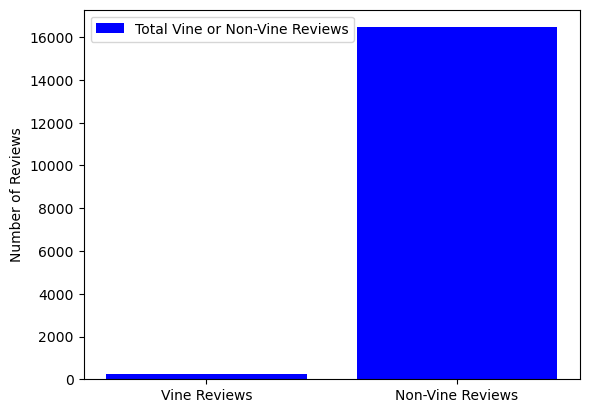

In [12]:
import matplotlib.pyplot as plt
x =["Vine Reviews", "Non-Vine Reviews"]
y =[231,16464]
plt.bar(x,y, color="blue", label="Total Vine or Non-Vine Reviews")
plt.ylabel("Number of Reviews")
plt.legend()
plt.savefig("images/total_vine_non_vine.png")
plt.show()


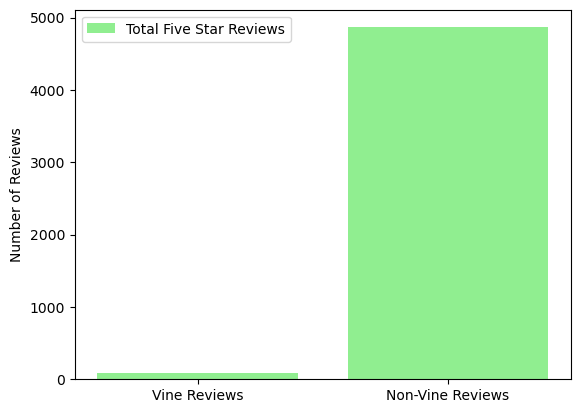

In [13]:
x =["Vine Reviews", "Non-Vine Reviews"]
y =[93,4867]
plt.bar(x,y, color="lightgreen", label="Total Five Star Reviews")
plt.ylabel("Number of Reviews")
plt.legend()
plt.savefig("images/total_five_star.png")
plt.show()

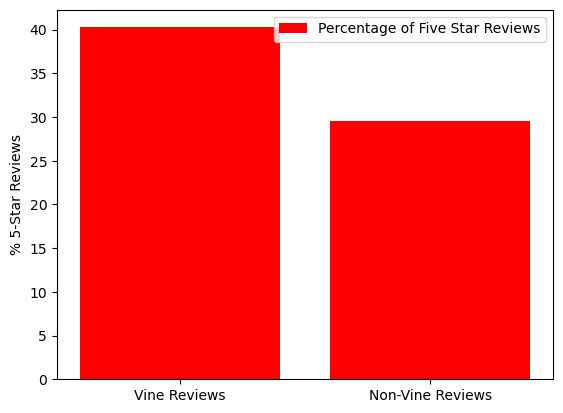

In [14]:
x =["Vine Reviews", "Non-Vine Reviews"]
y =[40.25974,29.561467]
plt.bar(x,y, color="red", label="Percentage of Five Star Reviews")
plt.ylabel("% 5-Star Reviews")
plt.legend()
plt.savefig("images/percent_five_star.png")
plt.show()